# **Import necessary Libraries**

In [20]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt


# **Load the breast cancer dataset**

In [21]:
data = load_breast_cancer()
X = data.data
y = data.target

# Convert the dataset to a Pandas DataFrame for EDA

In [22]:
feature_names = data.feature_names
df = pd.DataFrame(data=np.c_[X, y], columns=np.append(feature_names, 'target'))

# EDA

In [23]:
print("Dataset Info:")
print(df.info())
print("\nFirst Few Rows:")
print(df.head())
print("\nSummary Statistics:")
print(df.describe())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness e

# **Visualisation**

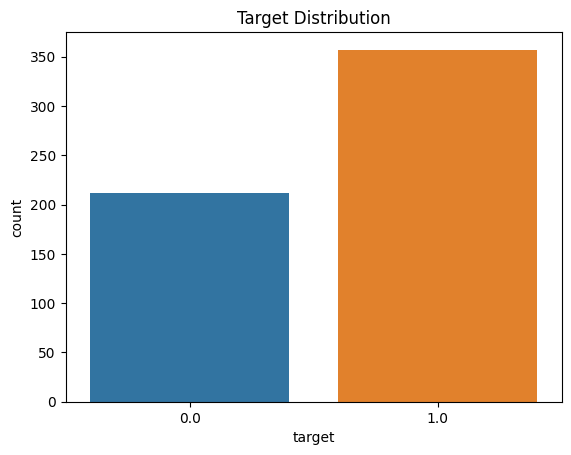

In [24]:
sns.countplot(x='target', data=df)
plt.title('Target Distribution')
plt.show()

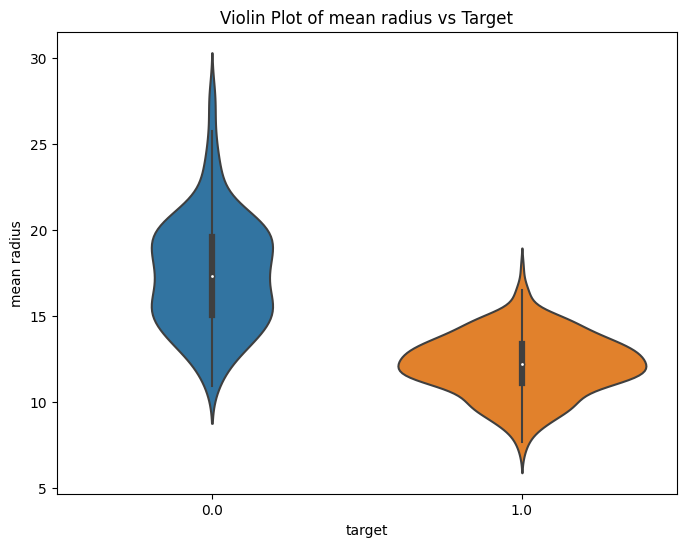

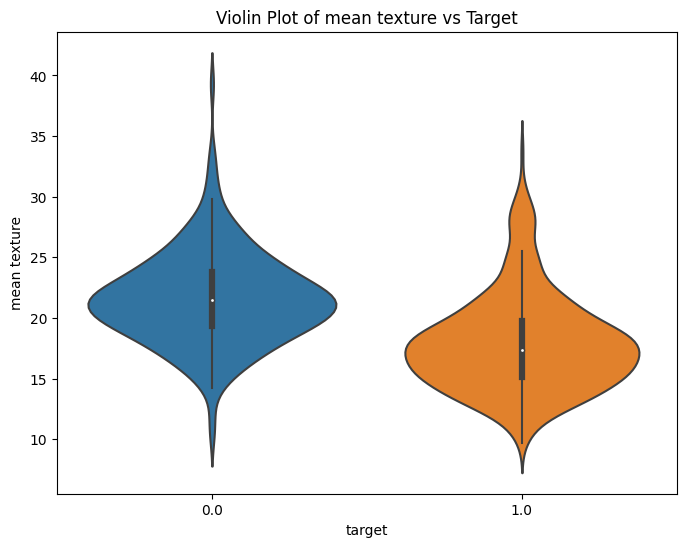

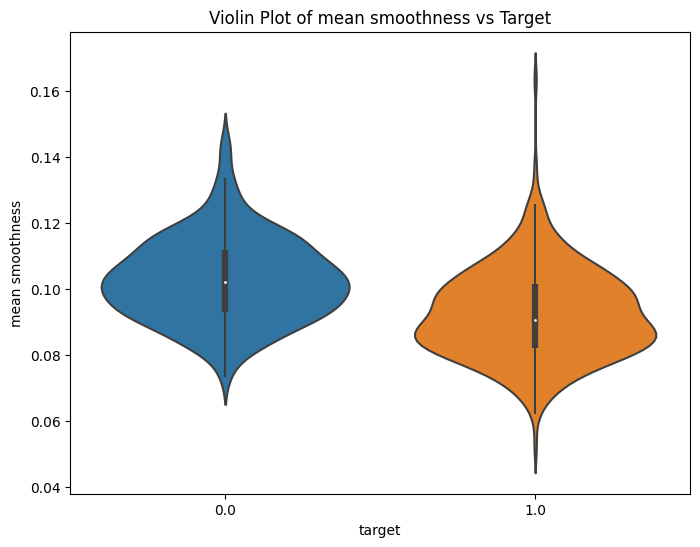

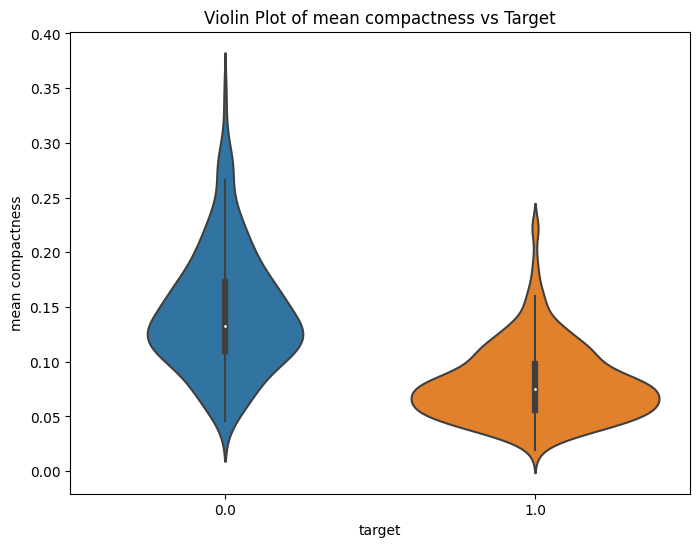

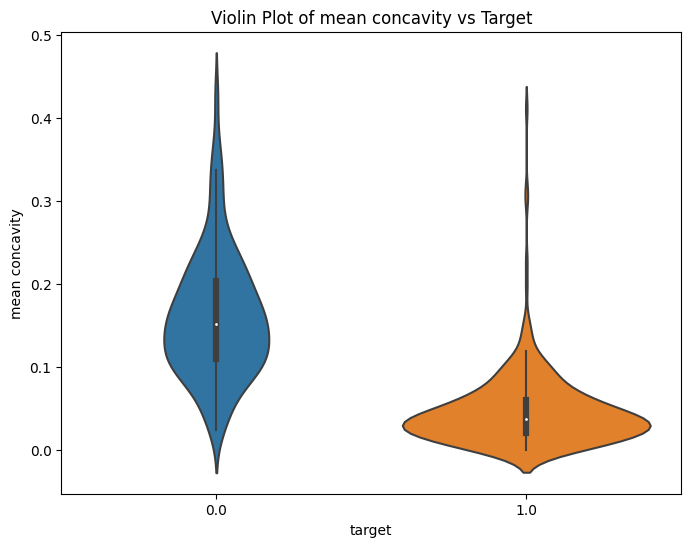

In [25]:
selected_features = ['mean radius', 'mean texture', 'mean smoothness', 'mean compactness', 'mean concavity']
for feature in selected_features:
    plt.figure(figsize=(8, 6))
    sns.violinplot(x='target', y=feature, data=df)
    plt.title(f'Violin Plot of {feature} vs Target')
    plt.show()

# **Standardize the features**

In [26]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [27]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# **Feature Selection**

In [28]:
# Select the top 10 most important features
k_best = SelectKBest(score_func=f_classif, k=10)
X_train_kbest = k_best.fit_transform(X_train, y_train)
X_test_kbest = k_best.transform(X_test)

# **SVM model**

In [29]:
# Train an SVM classifier on the selected features
model = SVC(kernel='linear')
model.fit(X_train_kbest, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_kbest)

# Evaluate the model
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))


Confusion Matrix:
 [[42  1]
 [ 1 70]]
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98        43
           1       0.99      0.99      0.99        71

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114

Accuracy: 0.9824561403508771


# **RandomForest Model**

In [30]:
# Train an RandomForest classifier on the selected features
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_kbest, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_kbest)

# Evaluate the model
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))


Confusion Matrix:
 [[40  3]
 [ 2 69]]
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.93      0.94        43
           1       0.96      0.97      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114

Accuracy: 0.956140350877193


# **LogisticRegression Model**

In [31]:
# Train an LogisticRegression classifier on the selected features
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train_kbest, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_kbest)

# Evaluate the model
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))


Confusion Matrix:
 [[42  1]
 [ 2 69]]
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.98      0.97        43
           1       0.99      0.97      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114

Accuracy: 0.9736842105263158


# **KNN Model**

In [32]:
# Train an KNN classifier on the selected features
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train_kbest, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_kbest)

# Evaluate the model
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))


Confusion Matrix:
 [[42  1]
 [ 2 69]]
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.98      0.97        43
           1       0.99      0.97      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114

Accuracy: 0.9736842105263158
